In [1]:
# Importing the necessary modules
import os 
import cv2 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO 

In [2]:
# loading the model 
model = YOLO("yolov8n.pt") 

In [8]:
# Getting the image path 
imagePath = "dataset/bandits/img1.jpg"

# Getting the results
results = model.predict("dataset/bandits/img1.jpg")


image 1/1 /Users/mbonuchinedu/Documents/Projects/banditsProject/dataset/bandits/img1.jpg: 384x640 9 persons, 1 car, 1 elephant, 163.6ms
Speed: 6.9ms preprocess, 163.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


person: 0.91
person: 0.90
person: 0.74
person: 0.70
person: 0.58
person: 0.48
person: 0.36
person: 0.30
car: 0.28
person: 0.27
elephant: 0.26


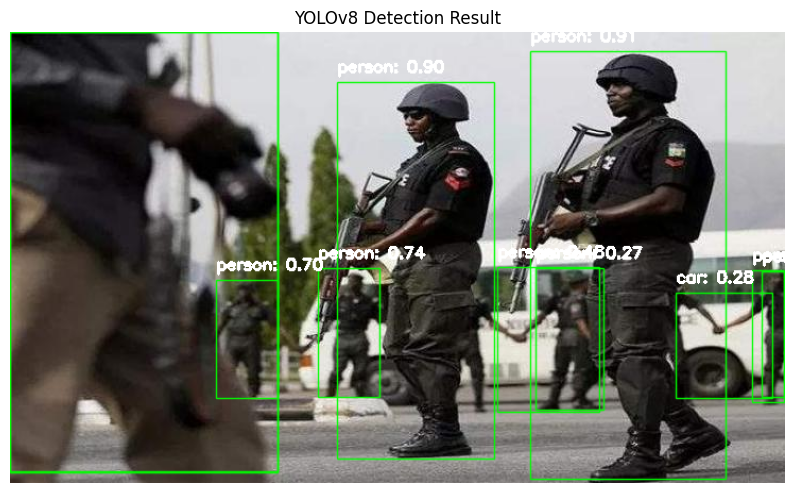

True

In [10]:
# Extract boxes, confidences, and class IDs from first image result
boundingBoxes = results[0].boxes.xyxy.cpu().numpy()       # Bounding boxes in [x1, y1, x2, y2] format
confidenceScores = results[0].boxes.conf.cpu().numpy()    # Confidence scores
classIds = results[0].boxes.cls.cpu().numpy()             # Class indices

# Optional: class names
classNames = model.names  # Automatically gets class names from model

# Load original image using OpenCV
originalImage = cv2.imread(imagePath)

# Draw boxes manually
for box, score, classId in zip(boundingBoxes, confidenceScores, classIds):
    x1, y1, x2, y2 = map(int, box)
    label = f"{classNames[int(classId)]}: {score:.2f}"
    print(label)

    # cv2.rectangle(originalImage, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.rectangle(originalImage, (x1, y1), (x2, y2), (0, 255, 0), 1, lineType=cv2.LINE_AA)
    cv2.putText(originalImage, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 255, 255), 2)

# # Convert BGR (OpenCV) to RGB (matplotlib)
imageRgb = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(imageRgb)
plt.axis('off')
plt.title("YOLOv8 Detection Result")
plt.show()

# Save the image 
cv2.imwrite("analyzedImage.jpg", originalImage) 